In [192]:
import numpy as np
import matplotlib.pyplot as plt
import pyccl as ccl

In [193]:
cls_carlos = np.load("../chains/carlos_chains/cl_cross_corr_v3_DES_2/cl_cross_corr_bestfit_info.npz")
cls_carlos = cls_carlos['cls']

In [194]:
meta = np.load("../data/FD/FD_meta.npz")
files = np.load("../data/FD/FD_files.npz")
plotting_files = np.load("fs8_ploting.npz")

In [195]:
BOSS = np.load("../data/fs8s/BOSS.npz")
eBOSS = np.load("../data/fs8s/eBOSS.npz")
Vipers = np.load("../data/fs8s/Vipers.npz")
sixdF = np.load("../data/fs8s/6dF.npz")
FastSound = np.load("../data/fs8s/FastSound.npz")
Wigglez = np.load("../data/fs8s/Wigglez.npz")

# Tests

In [196]:
ztest = np.array([0.1, 0.5, 1.0, 3.0])
cosmo_bm = ccl.CosmologyVanillaLCDM(transfer_function="bbks", 
                                            matter_power_spectrum="linear",
                                            Omega_g=0, Omega_k=0)
Dz_bm = ccl.growth_factor(cosmo_bm, 1/(1 + ztest))
fz_bm = ccl.growth_rate(cosmo_bm, 1/(1 + ztest))
fs8z_bm = 0.81 * Dz_bm * fz_bm

print(Dz_bm)
print(fz_bm)
print(fs8z_bm)

[0.9496636  0.77319003 0.61182745 0.31889837]
[0.57106081 0.74916541 0.8691701  0.98032637]
[0.43927569 0.46919025 0.43074352 0.25322583]


# Plots

In [197]:
data = meta["cls"]
err = np.sqrt(np.diag(meta["cov"]))
pairs = meta["pairs"]
idx = meta["idx"]
cls_m = plotting_files['cls_m'][0]
cls_s = plotting_files['cls_s'][0]
Dz_m = plotting_files['gps_m'][0]
Dz_s = plotting_files['gps_s'][0]
fs8_m = plotting_files['fs8s_m'][0]
fs8_s = plotting_files['fs8s_s'][0]

In [198]:
zs_fid = np.linspace(0, 3, len(fs8_m))
fid_cosmo = ccl.CosmologyVanillaLCDM()

## Dzs

In [199]:
Dz_LCDM = ccl.growth_factor(fid_cosmo, 1/(1+zs_fid))

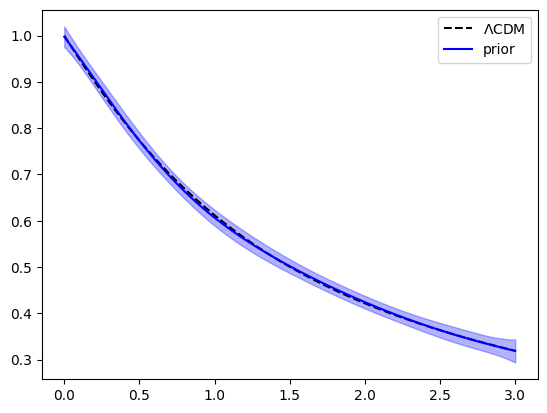

In [200]:
plt.plot(zs_fid, Dz_LCDM, 'k--', label=r"$\Lambda$CDM")
plt.plot(zs_fid, Dz_m, "b-", label="prior")
plt.fill_between(zs_fid, Dz_m + Dz_s, Dz_m - Dz_s, color="b", alpha=.3)
plt.legend()

In [201]:
d = np.mean(zs_fid[1:len(zs_fid)] - zs_fid[0:len(zs_fid)-1])
dDzs_mid = (Dz_m[2:len(zs_fid)]-Dz_m[0:len(zs_fid)-2])/(2*d)
zs_mid = (zs_fid[2:len(zs_fid)]+zs_fid[0:len(zs_fid)-2])/2
dDzs_c = np.interp(zs_fid, zs_mid, dDzs_mid)
fs8z_mid = -0.811 * (1 + zs_mid) * dDzs_mid
fs8z_c = -0.811 * (1 + zs_fid) * dDzs_c

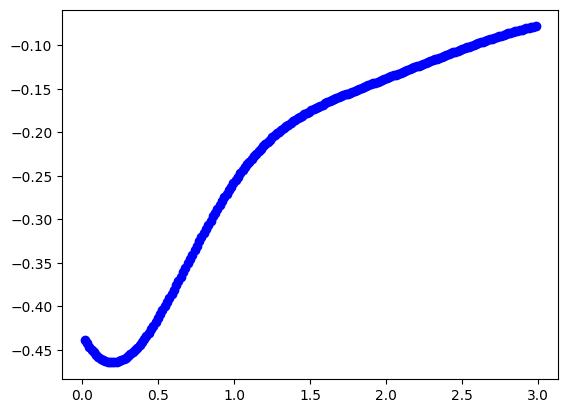

In [202]:
#plt.plot(zs_fid, dDzs_c, 'bo-')
plt.plot(zs_mid, dDzs_mid, 'bo-')

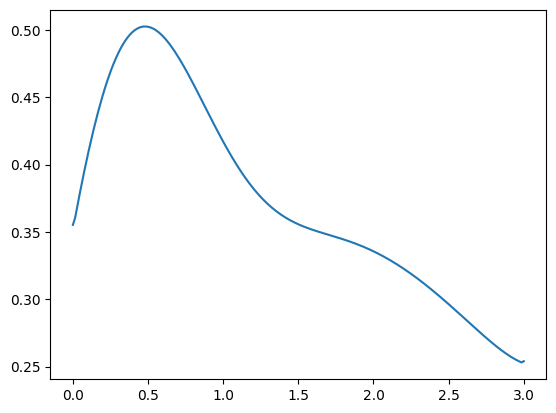

In [203]:
plt.plot(zs_fid, fs8z_c)

## fs8

In [204]:
fid_cosmo = ccl.CosmologyVanillaLCDM()
fs8_LCDM = 0.811*ccl.growth_factor(fid_cosmo, 1/(1+zs_fid))*ccl.growth_rate(fid_cosmo, 1/(1+zs_fid))

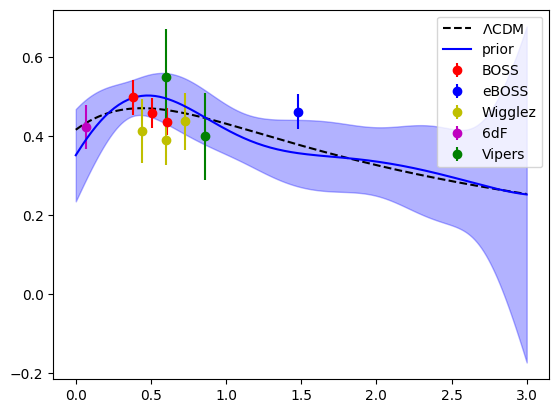

In [205]:
plt.plot(zs_fid, fs8_LCDM, 'k--', label=r"$\Lambda$CDM")
plt.errorbar(BOSS['z'], BOSS['data'], yerr=BOSS["err"], fmt='ro', label="BOSS")
plt.errorbar(eBOSS['z'], eBOSS['data'], yerr=eBOSS["err"], fmt='bo', label="eBOSS")
plt.errorbar(Wigglez['z'], Wigglez['data'], yerr=Wigglez["err"], fmt='yo', label="Wigglez")
plt.errorbar(sixdF['z'], sixdF['data'], yerr=sixdF["err"], fmt='mo', label="6dF")
plt.errorbar(Vipers['z'], Vipers['data'], yerr=Vipers["err"], fmt='go', label="Vipers")
plt.plot(zs_fid, fs8_m, "b-", label="prior")
plt.fill_between(zs_fid, fs8_m + fs8_s, fs8_m - fs8_s, color="b", alpha=.3)
plt.legend()

## DESgc-DESgc

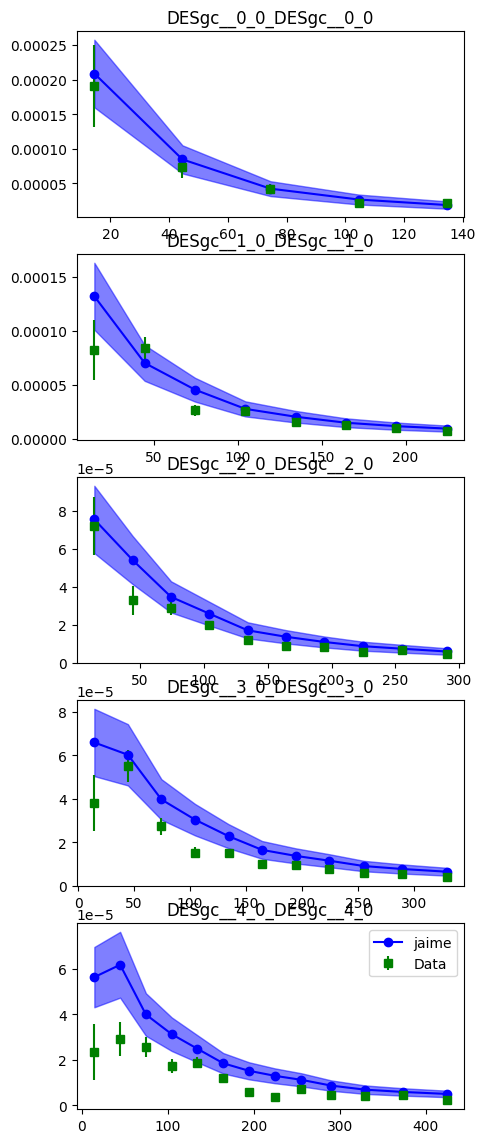

5


In [14]:
figure, axis = plt.subplots(5, figsize=(5,14))
l = 0
for i in range(0,5):
    t1, t2 = pairs[l][0], pairs[l][1]
    axis[i].errorbar(files["ls_{}_{}".format(t1, t2)], 
                     data[idx[l]:idx[l+1]], 
                     yerr=err[idx[l]:idx[l+1]], fmt='gs', label='Data')
    axis[i].plot(files["ls_{}_{}".format(t1, t2)],
                 cls_m[idx[l]:idx[l+1]], 'bo-', label="jaime")
    axis[i].fill_between(files["ls_{}_{}".format(t1, t2)],
                        (cls_m+cls_s)[idx[l]:idx[l+1]],
                        (cls_m-cls_s)[idx[l]:idx[l+1]],
                        color="b", alpha=.5)
    #axis[i].plot(files["ls_{}_{}".format(t1, t2)],
    #             cls_carlos[idx[l]:idx[l+1]],
    #             "ro-", label="carlos")
    axis[i].set_title("{}_{}".format(t1,t2))
    l += 1
plt.legend()
plt.show()
print(l)

## DESgc-DESwl

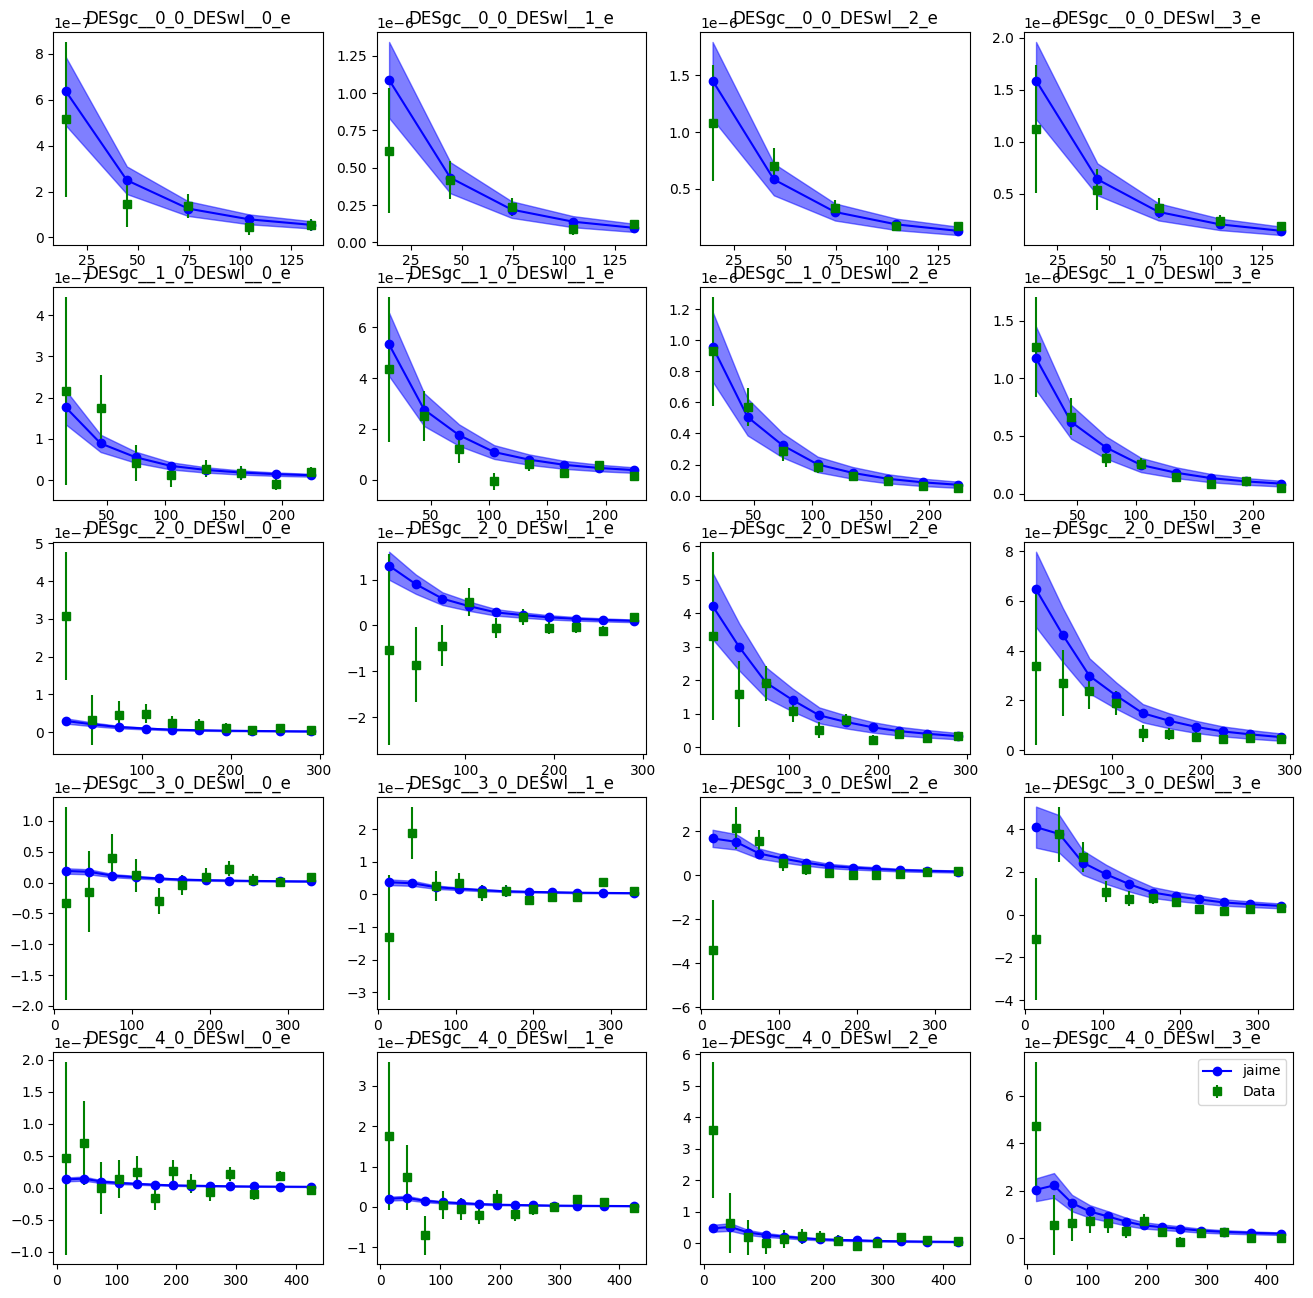

25


In [15]:
figure, axis = plt.subplots(5, 4, figsize=(16,16))
l = 5
for i in range(0,5):
    for j in range(0,4):
        t1, t2 = pairs[l][0], pairs[l][1]
        axis[i, j].errorbar(files["ls_{}_{}".format(t1, t2)], 
                     data[idx[l]:idx[l+1]], 
                     yerr=err[idx[l]:idx[l+1]], fmt='gs', label='Data')
        axis[i, j].plot(files["ls_{}_{}".format(t1, t2)],
                        cls_m[idx[l]:idx[l+1]], 'bo-', label="jaime")
        axis[i, j].fill_between(files["ls_{}_{}".format(t1, t2)],
                        (cls_m+cls_s)[idx[l]:idx[l+1]],
                        (cls_m-cls_s)[idx[l]:idx[l+1]],
                        color="b", alpha=.5)
        #axis[i, j].plot(files["ls_{}_{}".format(t1, t2)],
        #                cls_carlos[idx[l]:idx[l+1]],
        #                "ro-", label="carlos")
        axis[i, j].set_title("{}_{}".format(t1,t2))
        l += 1
plt.legend()
plt.show()
print(l)

## DESwl-DESwl

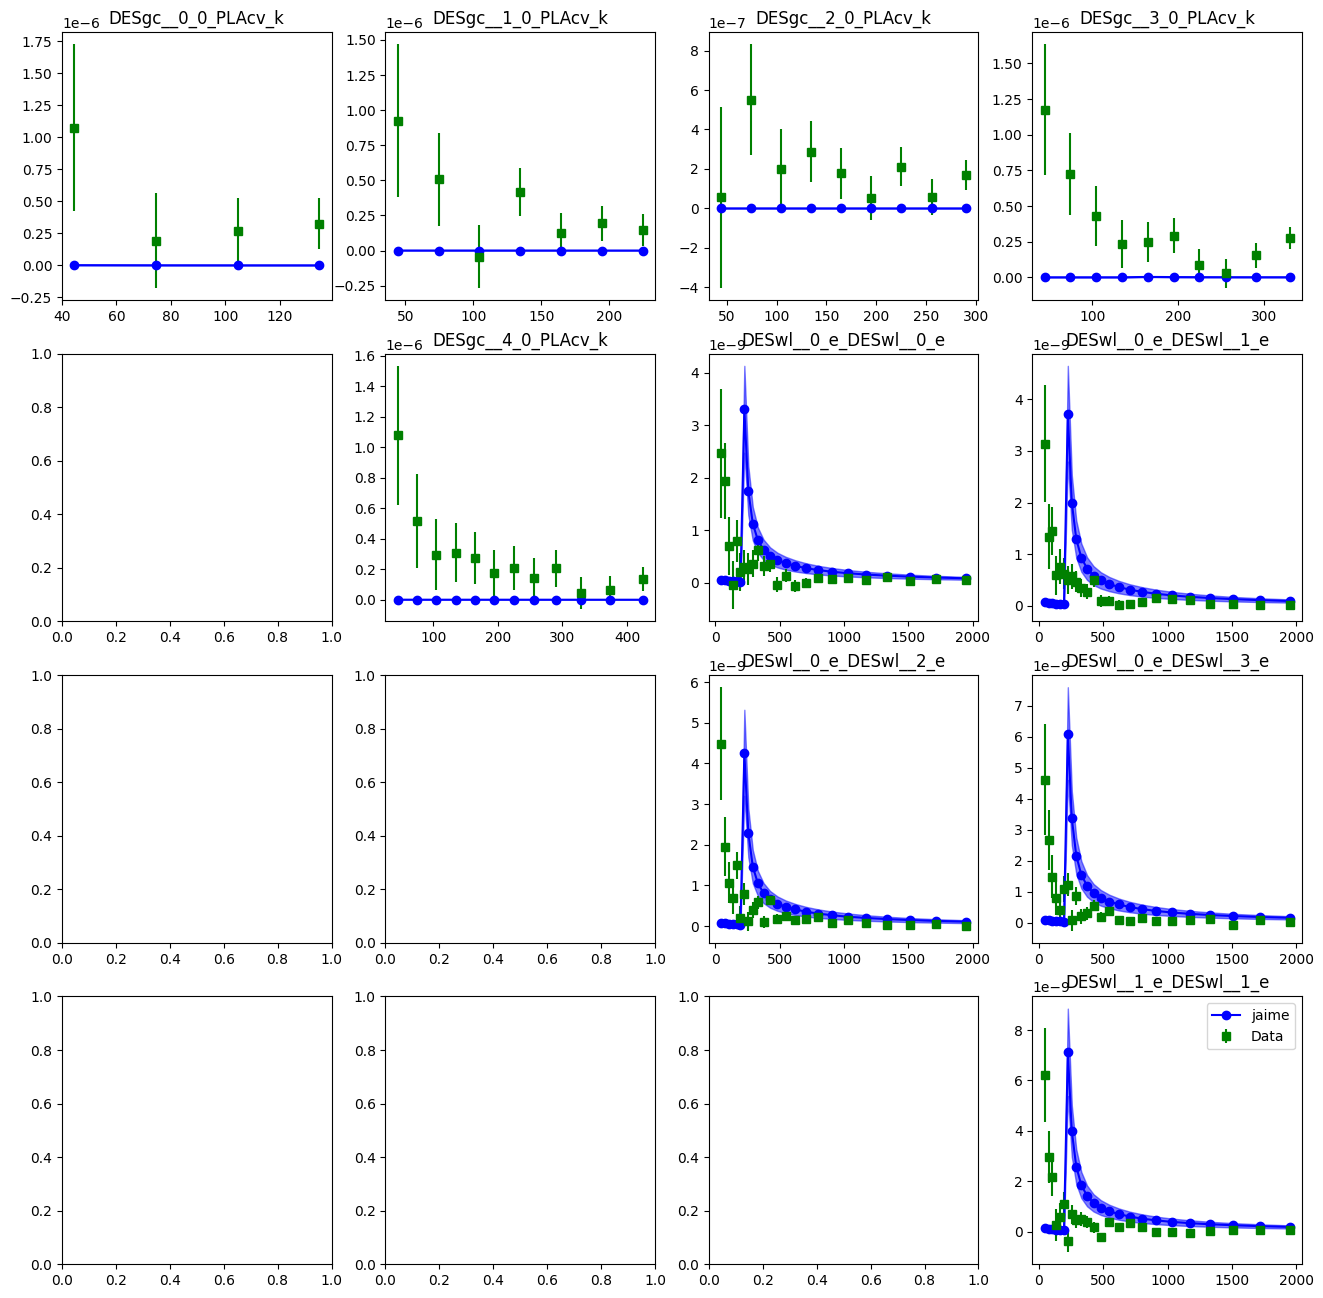

35


In [18]:
figure, axis = plt.subplots(4, 4, figsize=(16,16))
l = 25
for i in range(0,4):
    for j in range(0,4):
        if j >= i:
            t1, t2 = pairs[l][0], pairs[l][1]
            axis[i, j].errorbar(files["ls_{}_{}".format(t1, t2)], 
                         data[idx[l]:idx[l+1]], 
                         yerr=err[idx[l]:idx[l+1]], fmt='gs', label='Data')
            axis[i, j].plot(files["ls_{}_{}".format(t1, t2)],
                            cls_m[idx[l]:idx[l+1]], 'bo-', label="jaime")
            axis[i, j].fill_between(files["ls_{}_{}".format(t1, t2)],
                            (cls_m+cls_s)[idx[l]:idx[l+1]],
                            (cls_m-cls_s)[idx[l]:idx[l+1]],
                            color="b", alpha=.5)
            #axis[i, j].plot(files["ls_{}_{}".format(t1, t2)],
            #                cls_carlos[idx[l]:idx[l+1]],
            #                "ro-", label="carlos")
            axis[i, j].set_title("{}_{}".format(t1,t2))
            l += 1
plt.legend()
plt.show()
print(l)